In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Import the .csv file and check the Data type of each feature / column

In [6]:
df=pd.read_csv('Walmart (1).csv')

In [7]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
df.shape

(6435, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# view the top 5 records

In [10]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# To check for any null values in the given dataset

In [11]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
#Insights

#From the below step , it describes that there are no NULL Values

# View the data description like mean , min, 25,50,75 and 100 % and max

In [12]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
# plot the box plot which helps to identify outliers

In [13]:
import warnings
warnings.filterwarnings('ignore')

int64


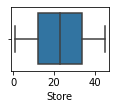

object
float64


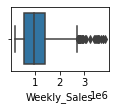

int64


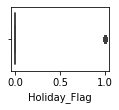

float64


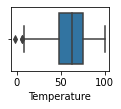

float64


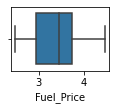

float64


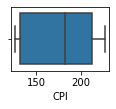

float64


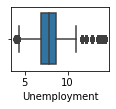

In [14]:
for i in df.columns:
  print(df[i].dtype)
  if(df[i].dtype != 'object'):
    count=1
    plt.subplot(3,3,count)
    sns.boxplot(df[i])
    count+=1
  plt.show()

In [ ]:
# Weekly sales and unemployment features are having outliers

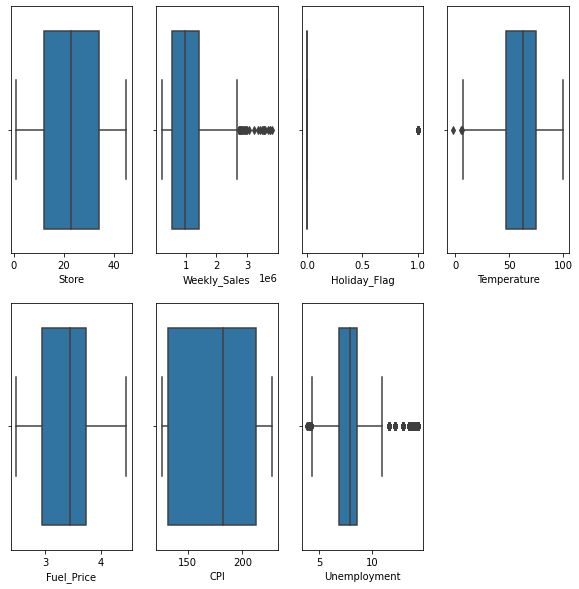

In [15]:
plt.figure(figsize=(10,10))
count=1
plt.subplot(2,4,count)
sns.boxplot(df.Store)
count=count+1
plt.subplot(2,4,count)
sns.boxplot(df.Weekly_Sales)
count=count+1
plt.subplot(2,4,count)
sns.boxplot(df.Holiday_Flag)
count=count+1
plt.subplot(2,4,count)
sns.boxplot(df.Temperature)
count=count+1
plt.subplot(2,4,count)
sns.boxplot(df.Fuel_Price)
count=count+1
plt.subplot(2,4,count)
sns.boxplot(df.CPI)
count=count+1
plt.subplot(2,4,count)
sns.boxplot(df.Unemployment)
plt.show()

In [ ]:
# To detect outliers

#weekly_sales and Unemployment features having outliers and needs to be removed

#Remove outliers

In [16]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [17]:
def remove_outliers(df,columnName):
  q1=np.percentile(df[columnName],0.25)
  q3=np.percentile(df[columnName],0.75)
  iqr=q3-q1
  ul = q3+1.5* q3
  ll=q1-1.5*q1
  df =df[(df[columnName] > ll) & (df[columnName] < ul)]
  return df

In [18]:
df=remove_outliers(df,'Weekly_Sales')

In [ ]:
# check " Weekly sales " after removing outliers

<AxesSubplot:xlabel='Weekly_Sales'>

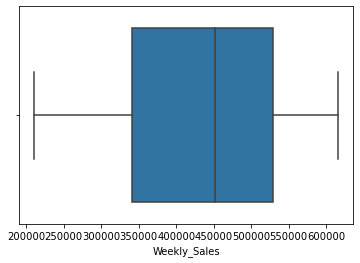

In [19]:
sns.boxplot(df['Weekly_Sales'])

In [20]:
df=remove_outliers(df,'Unemployment')

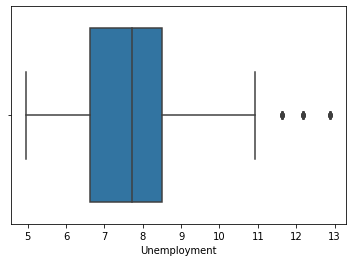

In [21]:
sns.boxplot(df['Unemployment'])
plt.show()

<AxesSubplot:>

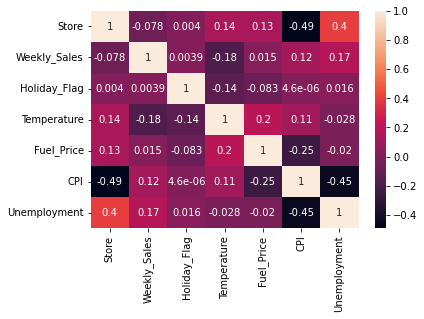

In [22]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
# There seems to be multi colinearity between few features. lets understand in detail by plotting the pair plots and scatter plots

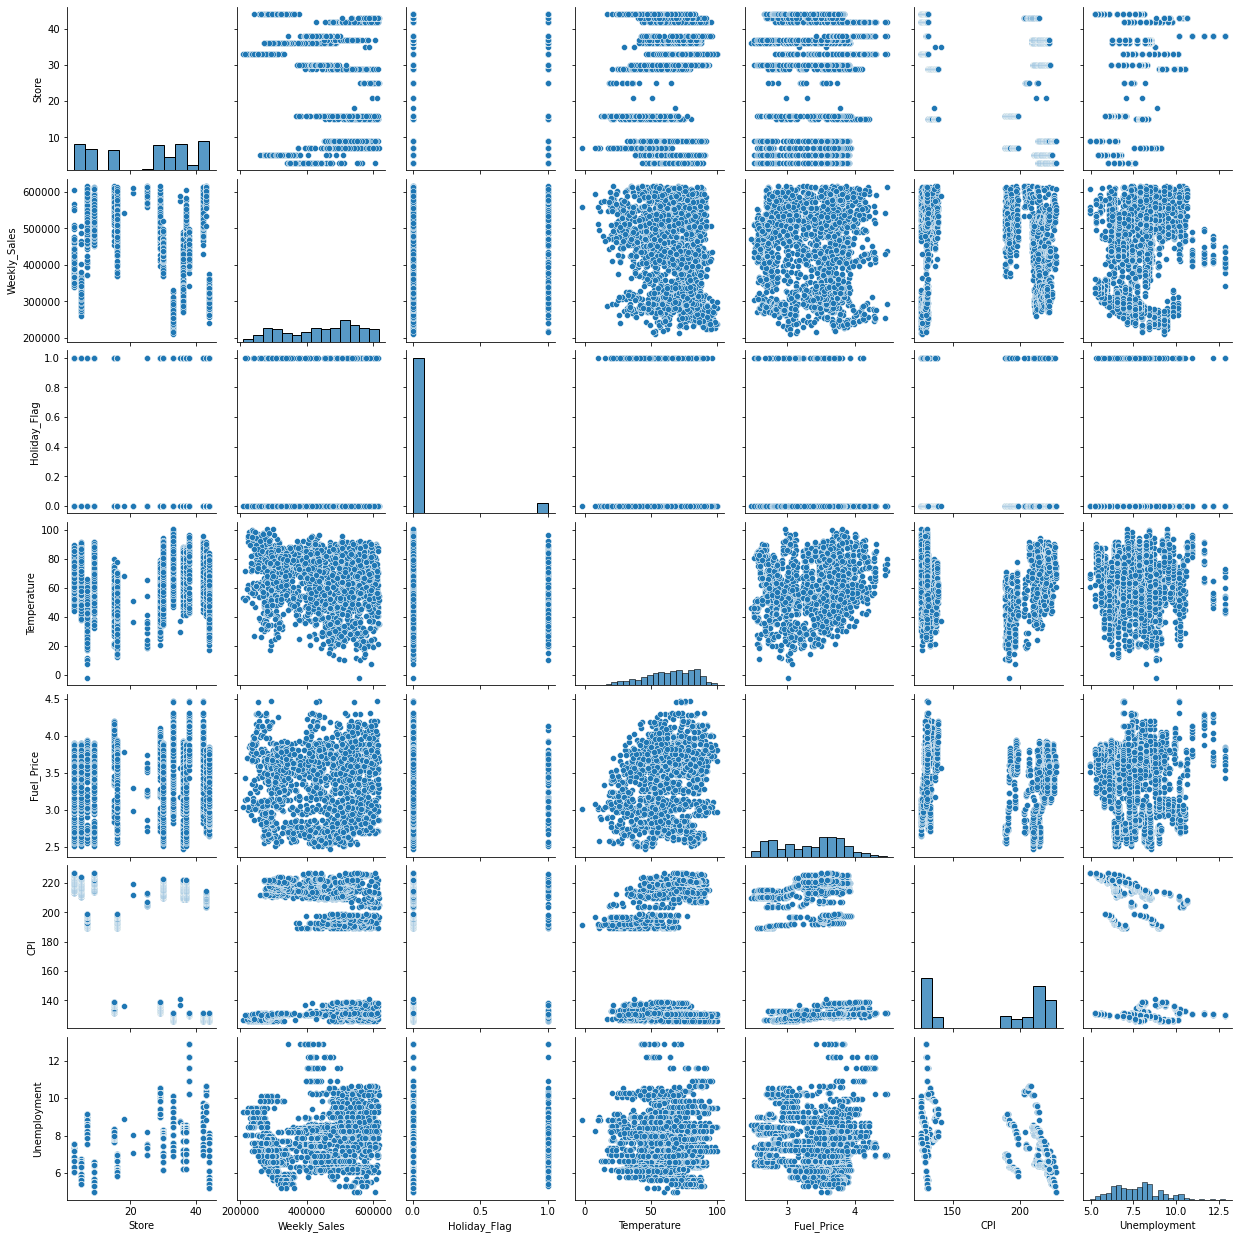

In [23]:
sns.pairplot(df)

In [ ]:
# Convert date to weeks , months and year

In [24]:
def extract_week(df):
  Date ='Date'
  df[Date]=pd.to_datetime(df[Date],infer_datetime_format=True)
  df['week'] = pd.DatetimeIndex(df[Date]).week
  df['month'] = pd.DatetimeIndex(df[Date]).month
  df['year'] = pd.DatetimeIndex(df[Date]).year

In [25]:
extract_week(df)

In [26]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
286,3,2010-05-02,461622.22,0,45.71,2.572,214.424881,7.368,17,5,2010
287,3,2010-12-02,420728.96,1,47.93,2.548,214.574792,7.368,48,12,2010
288,3,2010-02-19,421642.19,0,47.07,2.514,214.619887,7.368,7,2,2010
289,3,2010-02-26,407204.86,0,52.05,2.561,214.647513,7.368,8,2,2010
290,3,2010-05-03,415202.04,0,53.04,2.625,214.675139,7.368,18,5,2010


In [27]:
df['year'].value_counts()

2011    667
2010    589
2012    584
Name: year, dtype: int64

In [28]:
df['month'].value_counts()

4     184
10    173
9     171
5     169
7     166
3     158
8     151
2     145
1     145
6     140
12    128
11    110
Name: month, dtype: int64

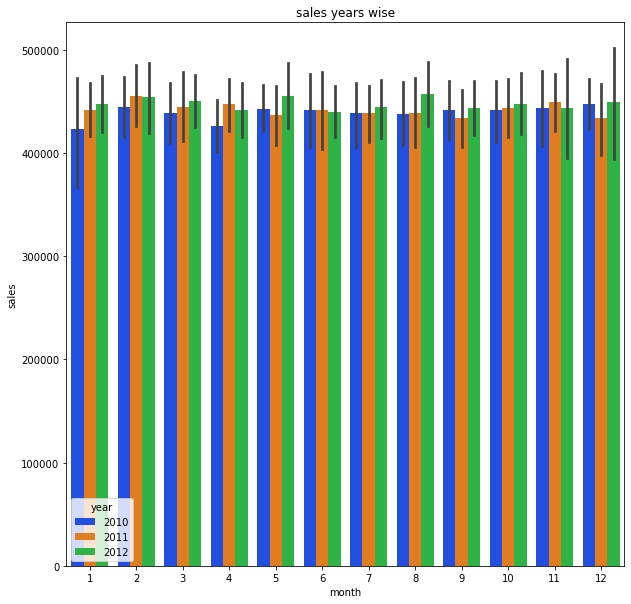

In [29]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='month',y='Weekly_Sales',hue='year',palette='bright')
plt.title('sales years wise')
plt.xlabel('month')
plt.ylabel('sales')
plt.show()

In [ ]:
# only slight variation in sales with respect to year

<AxesSubplot:xlabel='month', ylabel='Weekly_Sales'>

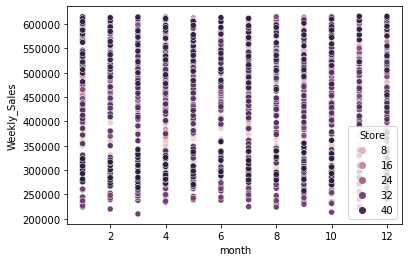

In [30]:
sns.scatterplot(data=df,x='month',y='Weekly_Sales',hue='Store')

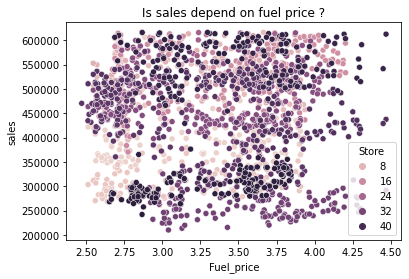

In [31]:
sns.scatterplot(data=df,x='Fuel_Price',y='Weekly_Sales',hue='Store')
plt.title('Is sales depend on fuel price ?')
plt.xlabel('Fuel_price')
plt.ylabel('sales')
plt.show()

In [ ]:

#sales doesnt depend on Fuel_price

<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

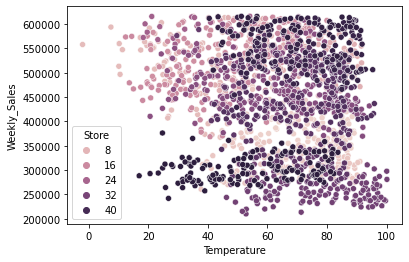

In [32]:
sns.scatterplot(data=df,x='Temperature',y='Weekly_Sales',hue='Store')

In [ ]:


# sales doesnt depend on Temperature

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

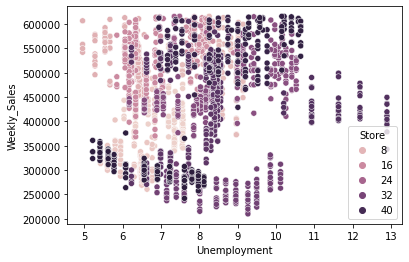

In [33]:
sns.scatterplot(data=df,x='Unemployment',y='Weekly_Sales',hue='Store')

In [ ]:
# Only slightly change in sales as the unemployment increases

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

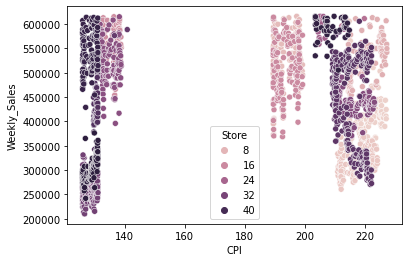

In [35]:
sns.scatterplot(data=df,x='CPI',y='Weekly_Sales',hue='Store')

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

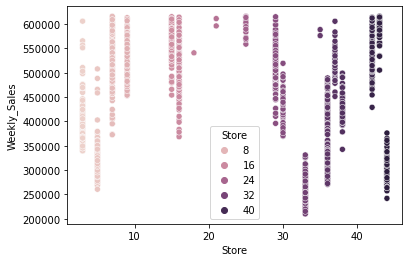

In [36]:
sns.scatterplot(data=df,x='Store',y='Weekly_Sales',hue='Store')

In [ ]:
#Store does affect sales Different Stores have different sales

Text(0.5, 1.0, 'is sales depend on temp')

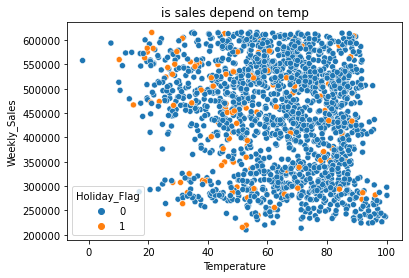

In [37]:
sns.scatterplot(data=df,y='Weekly_Sales',x='Temperature',hue='Holiday_Flag')
plt.title('is sales depend on temp')

In [ ]:
#Inference : Sales doesnt depend on temp

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1840 entries, 286 to 6291
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         1840 non-null   int64         
 1   Date          1840 non-null   datetime64[ns]
 2   Weekly_Sales  1840 non-null   float64       
 3   Holiday_Flag  1840 non-null   int64         
 4   Temperature   1840 non-null   float64       
 5   Fuel_Price    1840 non-null   float64       
 6   CPI           1840 non-null   float64       
 7   Unemployment  1840 non-null   float64       
 8   week          1840 non-null   int64         
 9   month         1840 non-null   int64         
 10  year          1840 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 237.0 KB


In [39]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
286,3,2010-05-02,461622.22,0,45.71,2.572,214.424881,7.368,17,5,2010
287,3,2010-12-02,420728.96,1,47.93,2.548,214.574792,7.368,48,12,2010
288,3,2010-02-19,421642.19,0,47.07,2.514,214.619887,7.368,7,2,2010
289,3,2010-02-26,407204.86,0,52.05,2.561,214.647513,7.368,8,2,2010
290,3,2010-05-03,415202.04,0,53.04,2.625,214.675139,7.368,18,5,2010


In [40]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'week', 'month', 'year'],
      dtype='object')

In [41]:
x=df.loc[ :, ['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','week','month','year']]

In [42]:
x

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
286,3,0,45.71,2.572,214.424881,7.368,17,5,2010
287,3,1,47.93,2.548,214.574792,7.368,48,12,2010
288,3,0,47.07,2.514,214.619887,7.368,7,2,2010
289,3,0,52.05,2.561,214.647513,7.368,8,2,2010
290,3,0,53.04,2.625,214.675139,7.368,18,5,2010
...,...,...,...,...,...,...,...,...,...
6287,44,0,64.80,3.821,131.043000,5.407,39,9,2012
6288,44,0,61.79,3.815,131.075667,5.217,19,5,2012
6289,44,0,55.10,3.797,131.108333,5.217,50,12,2012
6290,44,0,52.06,3.781,131.149968,5.217,42,10,2012


In [43]:
y=df.iloc[:,2]

In [44]:
y

286     461622.22
287     420728.96
288     421642.19
289     407204.86
290     415202.04
          ...    
6287    355307.94
6288    337390.44
6289    337796.13
6290    323766.77
6291    361067.07
Name: Weekly_Sales, Length: 1840, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [47]:
x_train

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
5942,42,0,85.61,3.794,129.201581,8.257,49,12,2011
4086,29,0,69.16,3.784,136.244097,9.863,6,2,2011
4168,30,0,82.29,2.669,210.880373,8.099,5,2,2010
874,7,0,54.24,2.737,189.445243,8.963,21,5,2010
4592,33,0,78.47,3.058,126.160226,9.849,21,5,2010
...,...,...,...,...,...,...,...,...,...
4083,29,0,74.69,3.880,136.144129,9.863,49,12,2011
5040,36,0,66.34,2.595,210.514440,8.476,32,8,2010
6050,43,0,52.52,2.843,203.447579,10.210,41,10,2010
2080,15,0,73.63,4.020,136.054032,7.806,18,5,2011


In [48]:
y_train

5942    603147.26
4086    497085.91
4168    450337.47
874     442734.55
4592    279246.33
          ...    
4083    471311.50
5040    444351.61
6050    598679.02
2080    607961.21
2224    563884.47
Name: Weekly_Sales, Length: 1472, dtype: float64

In [ ]:
#Linear Model

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred=lr.predict(x_test)

In [52]:
from sklearn.metrics import mean_squared_error,r2_score

In [53]:
linearRegressionError=mean_squared_error(y_test,y_pred)
linearRegressionError

10356768857.646679

In [54]:
r2_score(y_test,y_pred)*100

7.523334951381166

In [ ]:
#Inference : 7% of the variance available in input features can determine about the sales

#Random forest regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
r2_score=[]

In [57]:
y_test.shape[0]

368

In [58]:
 rfr=RandomForestRegressor(max_depth=14, random_state=42)

In [59]:
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=14, random_state=42)

In [60]:
y_pred=rfr.predict(x_test)

In [61]:
print("mean square error is ",mean_squared_error(y_test,y_pred))

mean square error is  994787505.8400131


In [62]:
y_test.shape

(368,)

In [65]:
x_train.shape

(1472, 9)

In [66]:
y_train

5942    603147.26
4086    497085.91
4168    450337.47
874     442734.55
4592    279246.33
          ...    
4083    471311.50
5040    444351.61
6050    598679.02
2080    607961.21
2224    563884.47
Name: Weekly_Sales, Length: 1472, dtype: float64

In [67]:
y_train=y_train.values.reshape(y_train.shape[0],1)

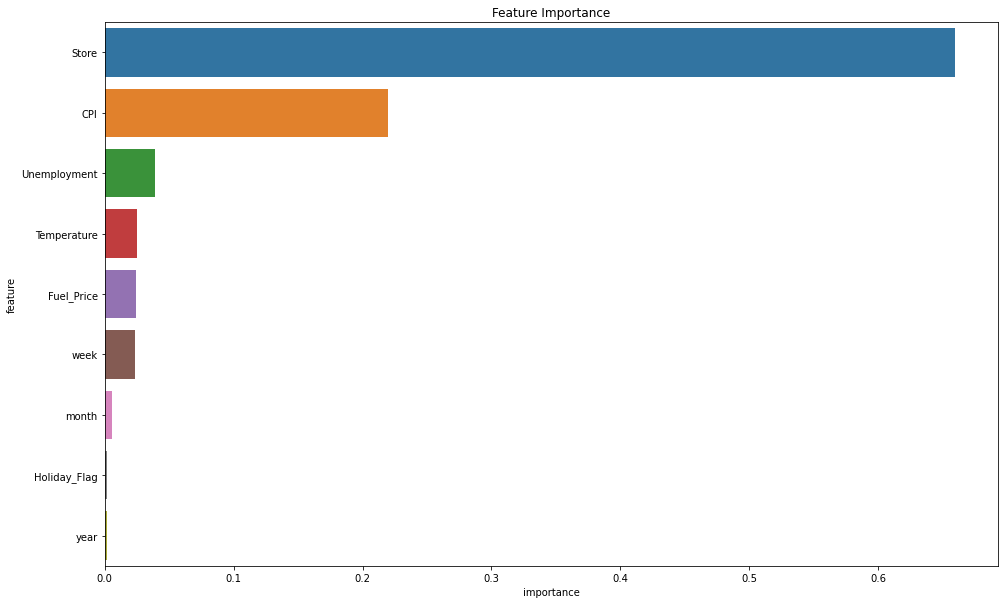

In [68]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': rfr.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
dtr=DecisionTreeRegressor()

In [71]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [72]:
y_pred=dtr.predict(x_test)

In [73]:
mean_squared_error(y_test,y_pred)

1689971582.3418138

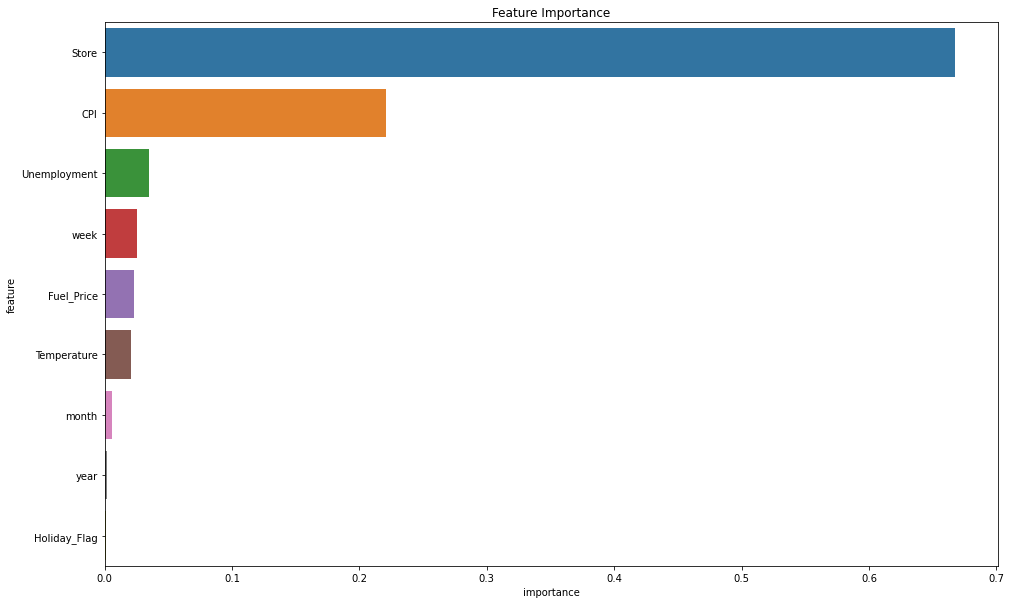

In [74]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': dtr.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

In [ ]:
summary:
1.weekly sales also depend on week of the year holidays weeks are good for sales.

2.final recommendation is with RandomForest model with tunned hyperparameters.